# Non Symbolic Computation

In [1]:
from collections import deque
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from decimal import *
import numpy as np

In [2]:
za_val = 10
zb_val = 1

vs_val = 1
io_val = vs_val/(za_val + zb_val)

number_of_lines_val = 1000

In [3]:
def calculate_fanout_decimal(za,zb,vs,number_of_lines, sending_bool,recieving_bool, cartesian_bool = False):

    za_decimal = Decimal(str(za))
    zb_decimal = Decimal(str(zb))
    vs_decimal = Decimal(str(vs))
    io_decimal = vs_decimal/(za_decimal+zb_decimal)

    number_lines = number_of_lines

    a_i_decimal = np.array([io_decimal*za_decimal,io_decimal])
    b_i_decimal = np.array([io_decimal*zb_decimal,io_decimal])

    fan_out_rows_numberic = [[a_i_decimal, b_i_decimal]]

    reflection_decimal = (za_decimal - zb_decimal)/(za_decimal + zb_decimal)

    AA_v_decimal = (-reflection_decimal)
    AA_i_decimal = reflection_decimal
    AA_decimal = np.array([AA_v_decimal,AA_i_decimal])

    AB_v_decimal = (-(1-reflection_decimal))
    AB_i_decimal = (1+reflection_decimal)
    AB_decimal = np.array([AB_v_decimal,AB_i_decimal])

    BA_v_decimal = -(1+reflection_decimal)
    BA_i_decimal = (1-reflection_decimal)
    BA_decimal = np.array([BA_v_decimal,BA_i_decimal])

    BB_v_decimal = (reflection_decimal)
    BB_i_decimal = -(reflection_decimal)
    BB_decimal = np.array([BB_v_decimal,BB_i_decimal])

    SC_decimal = np.array([-1,1])
    OC_decimal = np.array([1,-1])

    def reflect_self_A_decimal(m):
        return np.multiply(m,SC_decimal)

    def reflect_self_B_decimal(m):
        return np.multiply(m,OC_decimal)

    def reflect_AA_decimal(m):
        return np.multiply(m,AA_decimal)

    def reflect_AB_decimal(m):
        return np.multiply(m,AB_decimal)

    def reflect_BA_decimal(m):
        return np.multiply(m,BA_decimal)

    def reflect_BB_decimal(m):
        return np.multiply(m,BB_decimal)


    for i in range(1,number_lines):

        # Generate Self Reflected Wavefronts

        self_reflect_wavefronts = []
        most_recent_row = fan_out_rows_numberic[-1]
        is_A = True

        for wavefront in most_recent_row:

            if(is_A):
                temp_wavefront = reflect_self_A_decimal(wavefront)
                is_A = False
            else:
                temp_wavefront = reflect_self_B_decimal(wavefront)
                is_A = True
            
            self_reflect_wavefronts.append(temp_wavefront)

        fan_out_rows_numberic.append(self_reflect_wavefronts)

        # Generate New Wavefronts
        generated_wavefronts = deque()
        merged_wavefronts = []
        most_recent_row = fan_out_rows_numberic[-1]
        is_A = True

        for wavefront in most_recent_row:
            if(is_A):
                temp_wavefront_A = reflect_AA_decimal(wavefront)
                temp_wavefront_B = reflect_AB_decimal(wavefront)
                is_A = False
            else:
                temp_wavefront_A = reflect_BA_decimal(wavefront)
                temp_wavefront_B = reflect_BB_decimal(wavefront)
                is_A = True

            generated_wavefronts.append(temp_wavefront_A)
            generated_wavefronts.append(temp_wavefront_B)

        is_First_Wavefronts = True
        while len(generated_wavefronts) > 0:

            wavefront_A =  generated_wavefronts.popleft()
            wavefront_B =  generated_wavefronts.popleft()

            if(is_First_Wavefronts):
                merged_wavefronts.append(wavefront_A)
                merged_wavefronts.append(wavefront_B)
                is_First_Wavefronts = False

            elif(len(generated_wavefronts)==0):
                merged_wavefronts.append(wavefront_A)
                merged_wavefronts.append(wavefront_B)

            else:
                wavefront_A2 = generated_wavefronts.popleft()
                wavefront_B2 = generated_wavefronts.popleft()

                wavefront_A = wavefront_A + wavefront_A2
                wavefront_B = wavefront_B + wavefront_B2

                merged_wavefronts.append(wavefront_A)
                merged_wavefronts.append(wavefront_B)

        fan_out_rows_numberic.append(list(merged_wavefronts))

    x = []
    y = []
    v = []
    i = []
    p = []

    x.append(0)
    y.append(0)
    v.append(0)
    i.append(0)
    p.append(0)

    row_number = 0
    top_col = 0

    gap_col_big = 6
    gap_col_small = 2

    is_First_row = True
    is_recieving = True

    for row in fan_out_rows_numberic:

        col_number = top_col
        toggle = True

        if(is_First_row):
            row_number += 0
            top_col += 1

            is_First_row = False
        else:
            row_number += 2
            top_col += 2

        if(is_recieving):
            delta_col_first = gap_col_small
            delta_cal_second = gap_col_big
            is_recieving = False
        else:
            delta_col_first = gap_col_big 
            delta_cal_second = gap_col_small
            is_recieving = True

        if(is_recieving and recieving_bool or not(is_recieving) and sending_bool):

            for wavefront in row:

                value_v,value_i = wavefront

                x.append(row_number)
                y.append(col_number)

                v.append(value_v)
                i.append(value_i)
                p.append(value_v*value_i)
                
                if(toggle):
                    col_number -= delta_col_first
                    toggle = False
                else:
                    col_number -= delta_cal_second
                    toggle = True

    return x,y,v,i,p

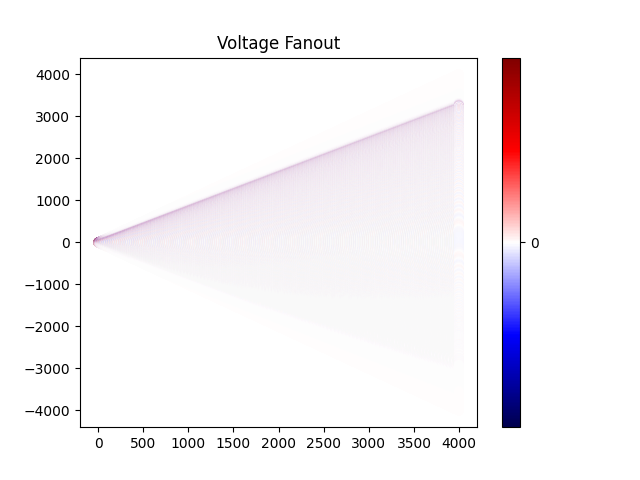

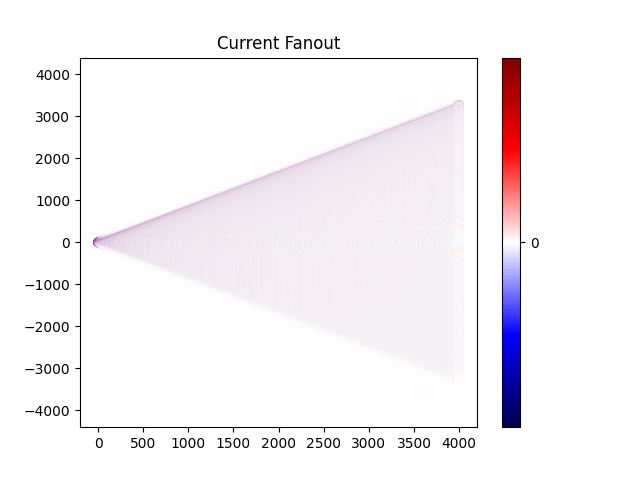

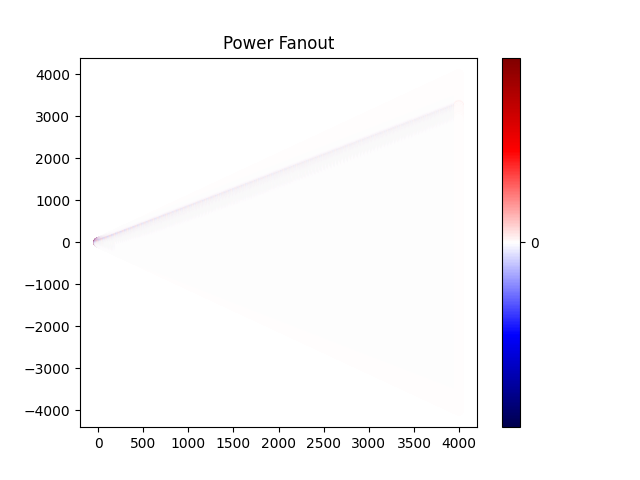

In [4]:
x,y,v,i,p = calculate_fanout_decimal(za_val,zb_val,vs_val,number_of_lines_val,True,True)

%matplotlib widget

fig_voltage, ax_voltage = plt.subplots()

ax_voltage.set_title('Voltage Fanout')
cax = ax_voltage.scatter(x,y,c=v,cmap=cm.seismic)
cbar = fig_voltage.colorbar(cax, ticks=[-1, 0, 1])

fig_current, ax_current = plt.subplots()

ax_current.set_title('Current Fanout')
cax = ax_current.scatter(x,y,c=i,cmap=cm.seismic)
cbar = fig_current.colorbar(cax, ticks=[-1, 0, 1])

fig_power, ax_power = plt.subplots()

ax_power.set_title('Power Fanout')
cax = ax_power.scatter(x,y,c=p,cmap=cm.seismic)
cbar = fig_power.colorbar(cax, ticks=[-1, 0, 1])

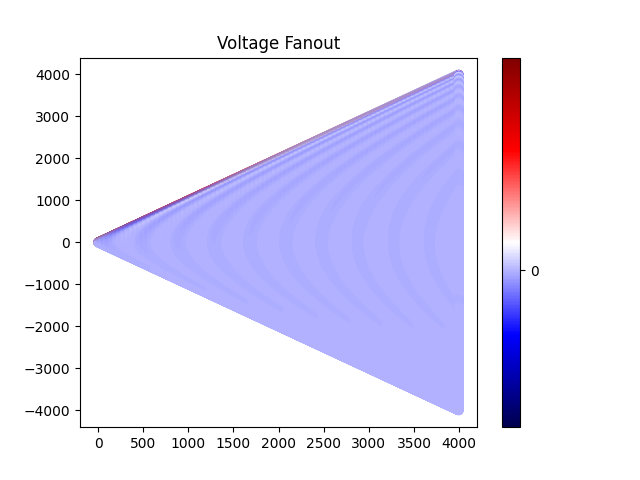

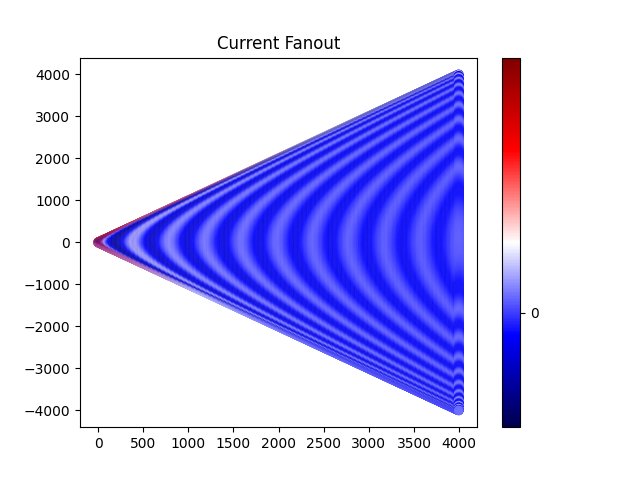

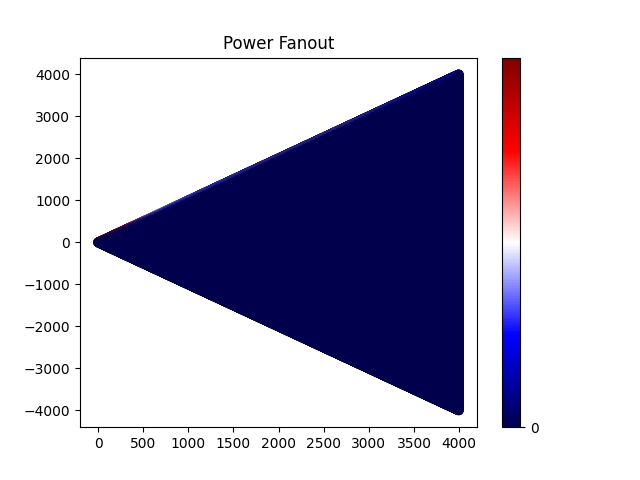

In [5]:
x,y,v,i,p = calculate_fanout_decimal(100,0.1,vs_val,number_of_lines_val,True,False)

fig_voltage, ax_voltage = plt.subplots()

ax_voltage.set_title('Voltage Fanout')
cax = ax_voltage.scatter(x,y,c=v,cmap=cm.seismic)
cbar = fig_voltage.colorbar(cax, ticks=[-1, 0, 1])

fig_current, ax_current = plt.subplots()

ax_current.set_title('Current Fanout')
cax = ax_current.scatter(x,y,c=i,cmap=cm.seismic)
cbar = fig_current.colorbar(cax, ticks=[-1, 0, 1])

fig_power, ax_power = plt.subplots()

ax_power.set_title('Power Fanout')
cax = ax_power.scatter(x,y,c=p,cmap=cm.seismic)
cbar = fig_power.colorbar(cax, ticks=[-1, 0, 1])

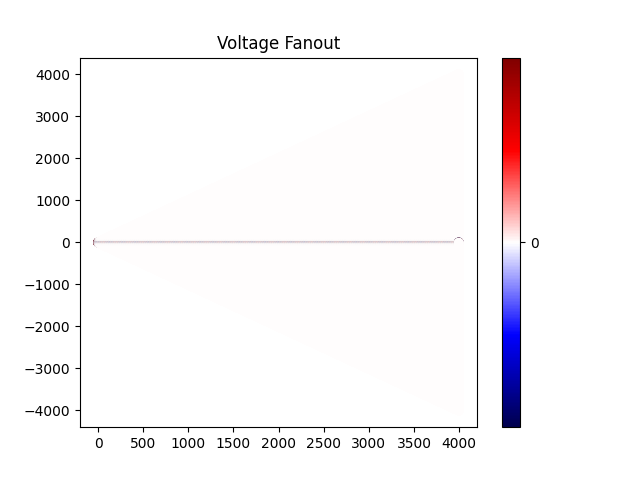

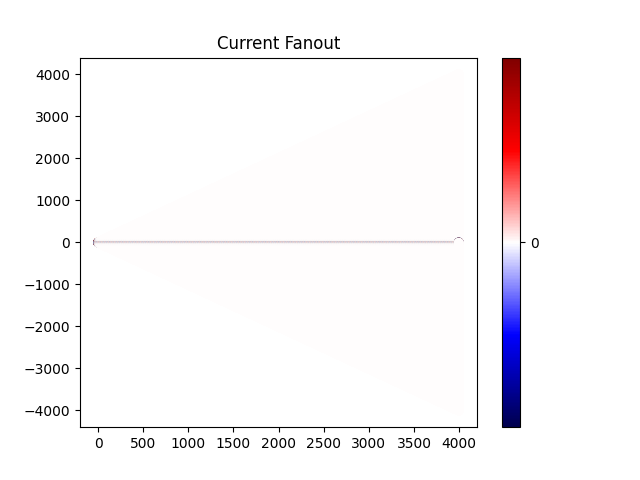

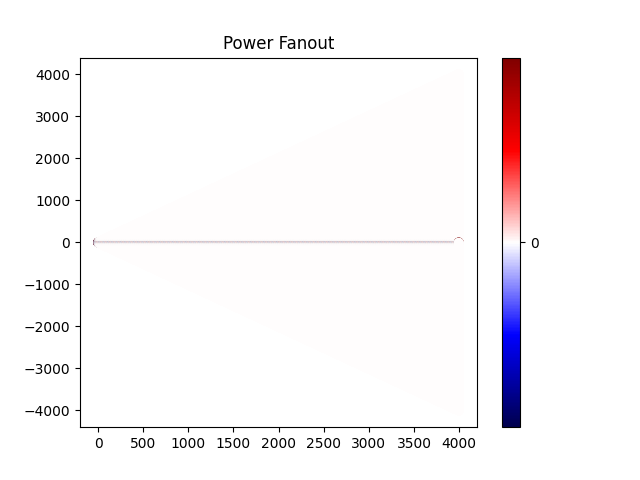

In [6]:
x,y,v,i,p = calculate_fanout_decimal(1,1,vs_val,number_of_lines_val,True,True)

fig_voltage, ax_voltage = plt.subplots()

ax_voltage.set_title('Voltage Fanout')
cax = ax_voltage.scatter(x,y,c=v,cmap=cm.seismic)
cbar = fig_voltage.colorbar(cax, ticks=[-1, 0, 1])

fig_current, ax_current = plt.subplots()

ax_current.set_title('Current Fanout')
cax = ax_current.scatter(x,y,c=i,cmap=cm.seismic)
cbar = fig_current.colorbar(cax, ticks=[-1, 0, 1])

fig_power, ax_power = plt.subplots()

ax_power.set_title('Power Fanout')
cax = ax_power.scatter(x,y,c=p,cmap=cm.seismic)
cbar = fig_power.colorbar(cax, ticks=[-1, 0, 1])

In [7]:
number_of_lines = 20

x_scale = 1
y_scale = 1

A = 7
B = 5

Delta = A - B 

fanout_number_diagram = []
row = []
x_numbers = []
y_numbers = []
numbers = []

fanout_number_diagram.append(0)
x_numbers.append(0)
y_numbers.append(0)
numbers.append(0)


for i in range(1,number_of_lines+1):
    row_number = i
    items_in_row = row_number + 1

    row = []
    top_number = A*row_number
    y_number = row_number

    for j in range(0,items_in_row):
        row.append(top_number)
        x_numbers.append(row_number*x_scale)
        y_numbers.append(y_number*y_scale)
        numbers.append(top_number)

        top_number = top_number - Delta
        y_number = y_number - 2
    
    fanout_number_diagram.append(row)




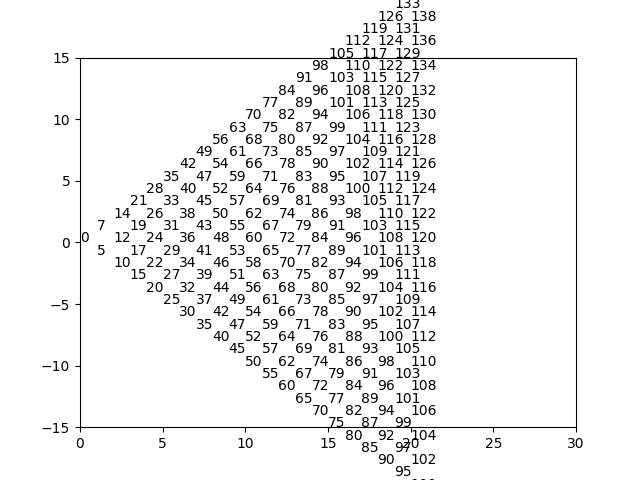

In [8]:
fig_numbers, ax_numbers = plt.subplots()

ax_numbers.set_xlim([0,30])
ax_numbers.set_ylim([-15,15])

for x,y,n in zip(x_numbers,y_numbers,numbers):

    ax_numbers.text(x,y,n)